<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
  **1. Introduction**
---

In the contemporary digital-media age, the Hollywood film industry has seen a massive growth in recent few decades. With movies becoming a cultural phenomena the film industry generates billions of dollars revenue yearly. 

---
<a name = Section2></a>
 **2. Problem Statement**
---

- In the past few years, the global film industry has grown more rapidly than ever.
In 2018 alone, movies generated approximately $41.7 billion in worldwide revenue.

  Yet, several important business questions remain:

    - What types of movies earn the highest box-office revenue?

    - How much influence does the director, cast, or genre have on a film’s success?

    - Do budget and popularity significantly impact box-office performance?

<p align="center"><img src="https://webstockreview.net/images/cinema-clipart-cartoon-19.png"></p>


- **Example Scenario:**

  - Cinemania, an American Box Office where tickets are sold to the public for movies.

  - Over the past few years, it has become one of the most liked and visited place in different areas.

  - They are planning to add new services and enhance the quality of existing services.

  - To achieve a desired objective they need a guidance in a most effective way.

  - To tackle this problem they hired a genius team of data scientists. Consider you are one of them...

---
<a id = Section3></a>
  **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
# Library to generate basic statistics about data and basic univariate analysis
!pip install ydata-profiling

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
# Upgrading pandas profiling to the latest version
!pip install -q --upgrade ydata-profiling                          

  You can safely remove it manually.


### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
# Importing package pandas (For Panel Data Analysis)
import pandas as pd

# Unfolding hidden features if the cardinality is high
pd.set_option('display.max_columns', None) 

# Unfolding the max feature width for better clearity
pd.set_option('display.max_colwidth', None)                        

# Import Pandas Profiling (To generate Univariate Analysis)
from ydata_profiling import ProfileReport

# Importing package numpys (For Numerical Python)
import numpy as np

# Importing pyplot interface to use matplotlib
import matplotlib.pyplot as plt

# Importing seaborn library for interactive visualization
import seaborn as sns                                               
%matplotlib inline

# Importing warning to disable runtime warnings
import warnings

# Warnings will appear only once
warnings.filterwarnings("ignore")                                   


---
<a name = Section4></a>
 **4. Data Acquisition & Description**
---

* The data set contains data of 1000 top grossing from year 2006 to 2016.
* The available features of the data set are Rank, Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore. Below is the data dictionary explaining all features of the data set.

|Id|Feature|Description|
|:--|:--|:--|
|01|Rank|Movie Rank| 
|02| Title | Title of the movie|  
|03| Genre | The various Genre that the movie can be associated with| 
|04| Description| Short description about the movie|   
|05| Director| Director of the movie|
|06| Actors| Main actors in the movie|
|07| Year| Year in which the movie was released|
|08| Runtime (minutes)| Total movie playing time|
|09| Rating | Movie rating|
|10| Votes| Votes for the movie|
|11| Revenue (Millions)| Revenue by the movie (in millions)|
|12| Metascore| Is the score of the movie on the metacritic website by critics|


In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
print('Data Shape:', data.shape)
data.head(3)

Data Shape: (1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0


### **Data Description**

In [5]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [6]:
data["Revenue (Millions)"].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

#### **Obserbations:**

##### ~ The data has zero value in Revenue column.
##### ~ Average runtime is aprroximately 2 Hours.
##### ~ Revenue and Metascore has missing values.

### **Data Information**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [8]:
# Checking number of unique values in different columns
data['Actors'].value_counts()

Actors
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                   1
                                                                      ..
Alexi Pappas, Chase Offerle, Rachel Dratch, Andy Buckley               1
Shailene Woodley, Ansel Elgort, Nat Wolff, Laura Dern                  1
Adam Sandler, Drew Barrymore, Wendi McLendon-Covey, Kevin Nealon       1
Vin Diesel, Paul Walker, Michelle Rodriguez, Jordana Brewster          1
Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines               1
Name: count, Length: 996, dtype: int64

In [9]:
data['Actors'].nunique

<bound method IndexOpsMixin.nunique of 0                            Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana
1         Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron
2                James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula
3      Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson
4                              Will Smith, Jared Leto, Margot Robbie, Viola Davis
                                          ...                                    
995                   Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris
996                  Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart
997                 Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani
998                  Adam Pally, T.J. Miller, Thomas Middleditch,Shannon Woodward
999                      Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines
Name: Actors, Length: 1000, dtype: object>

In [10]:
data['Title'].value_counts()

Title
The Host                   2
Guardians of the Galaxy    1
The Hurt Locker            1
The Daughter               1
Pineapple Express          1
                          ..
The Fault in Our Stars     1
Blended                    1
Fast & Furious             1
Looper                     1
Nine Lives                 1
Name: count, Length: 999, dtype: int64

In [11]:
#Checking specific information using pandas query() method
data.query('Title=="The Host"')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance","When an unseen enemy threatens mankind by taking over their bodies and erasing their memories, Melanie will risk everything to protect the people she cares most about, proving that love can conquer all in a dangerous new world.",Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and focuses its attention on attacking people. One victim's loving family does what it can to rescue her from its clutches.,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doona Bae",2006,120,7.0,73491,2.20,85.0


In [12]:
data['Genre'].value_counts()

Genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: count, Length: 207, dtype: int64

In [13]:
data['Director'].value_counts()

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: count, Length: 644, dtype: int64

### **Obserbations:**

##### ~ The data set has 12 features, 7 dimensions and 5 metrics.
##### ~ Two different movies with name 'The Host' present in the 'Title' category. 
##### ~ Actors and Genre columns have multiple entries under same row.
##### ~ Revenue and Metascore has missing values.

---
<a name = Section5></a>
 **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data to get some observations out of it...

In [14]:
report = ProfileReport(df=data)
report.to_file("Pre_1000_movies_profile_report.html")
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/12 [00:00<?, ?it/s]
%|██████▉                                                                            | 1/12 [00:00<00:01,  7.64it/s]
%|█████████████▊                                                                     | 2/12 [00:00<00:02,  4.51it/s]
%|████████████████████▊                                                              | 3/12 [00:00<00:01,  5.35it/s]
%|███████████████████████████▋                                                       | 4/12 [00:01<00:02,  3.37it/s]
%|██████████████████████████████████▌                                                | 5/12 [00:01<00:01,  4.22it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  8.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


---
<a name = Section6></a>
 **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data the following key tasks are involved:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [15]:
# Saving the original data set in a new variable for data cleaning.
copy_data=data
copy_data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0


In [16]:
copy_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### **Handling missing values of Revenue (Millions) and Metascore columns**


In [17]:
# Taking median of Revenue (Millions) columns
revenue_med=copy_data['Revenue (Millions)'].median()
revenue_med

47.985

In [18]:
# Taking median of 'Metascore' columns
meta_med=copy_data['Metascore'].median()
meta_med

59.5

In [19]:
copy_data['Revenue (Millions)'].fillna(copy_data['Revenue (Millions)'].median(),inplace=True)
copy_data['Metascore'].fillna(copy_data['Metascore'].median(),inplace=True)

In [20]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### **Outlier Analysis using Flooring and Capping method**

In [21]:
copy_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [22]:
# Creating a series of numerical variable 
outlier_columns=['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore']
outlier_columns

['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']

In [23]:
# Using for loop to implement 98th and 2nd quantile method in all columns
for column in outlier_columns:
    upper_value=copy_data[column].quantile(0.98)
    lower_value=copy_data[column].quantile(0.02)
    # copy_data[column]=copy_data[column].clip(lower=lower_value,upper=upper_value)
    print("Max value of ", column,":",copy_data[column].max())
    print("Min value of ", column,":",copy_data[column].min())

Max value of  Runtime (Minutes) : 191
Min value of  Runtime (Minutes) : 66
Max value of  Rating : 9.0
Min value of  Rating : 1.9
Max value of  Votes : 1791916
Min value of  Votes : 61
Max value of  Revenue (Millions) : 936.63
Min value of  Revenue (Millions) : 0.0
Max value of  Metascore : 100.0
Min value of  Metascore : 11.0


In [24]:
# Saving clean data in a new variable 
clean_data=copy_data

### Observations
A movie with extremely high revenue or votes might be a blockbuster, and it could provide critical information about the success of certain movies. We will explore further in the EDA section

---
<a name = Section7></a>
 **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

In [25]:
report = ProfileReport(df=data)
report.to_file("Post_Report_1000_movies_profile_report.html")
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/12 [00:00<?, ?it/s]
%|█████████████▊                                                                     | 2/12 [00:00<00:01,  5.39it/s]
%|███████████████████████████▋                                                       | 4/12 [00:01<00:02,  3.66it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  9.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


---
<a name = Section8></a>
 **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.


### **Q1: What is the overall distribution of number of movies and total revenue generated per year?**

In [26]:
clean_data['Year'].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

In [27]:
#Total revenue in each year
rev_by_year=clean_data.groupby(by=['Year']).agg({'Revenue (Millions)':['count','sum', 'mean']})
rev_by_year

Revenue (Millions)                       
                  count        sum        mean
Year                                          
2006                 44   3720.430   84.555227
2007                 53   4498.170   84.871132
2008                 52   5101.205   98.100096
2009                 51   5484.200  107.533333
2010                 60   6133.605  102.226750
2011                 63   5479.945   86.983254
2012                 64   6910.290  107.973281
2013                 91   7810.675   85.831593
2014                 98   8189.340   83.564694
2015                127   9525.910   75.007165
2016                297  15626.270   52.613704

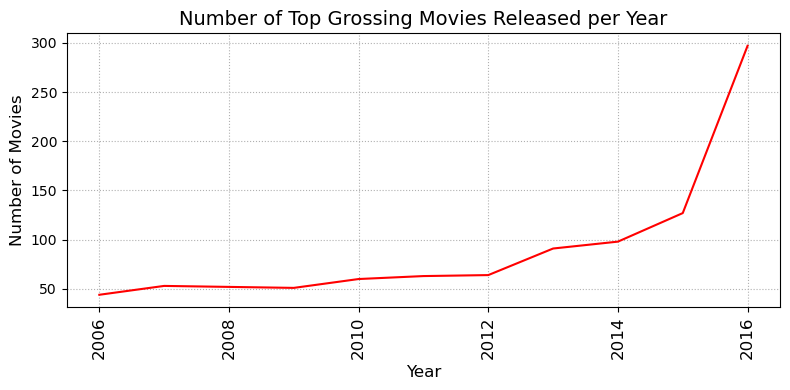

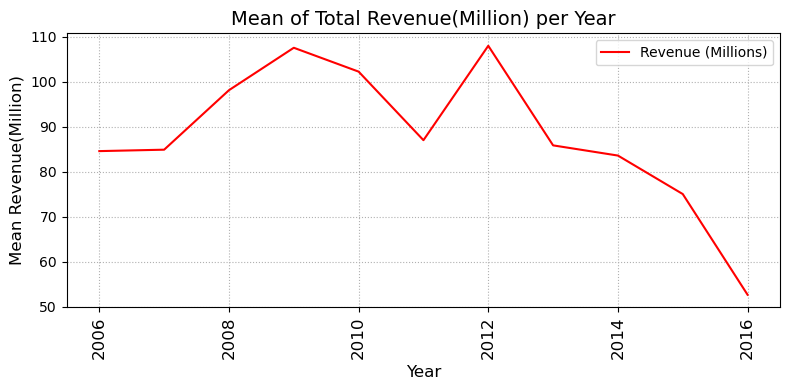

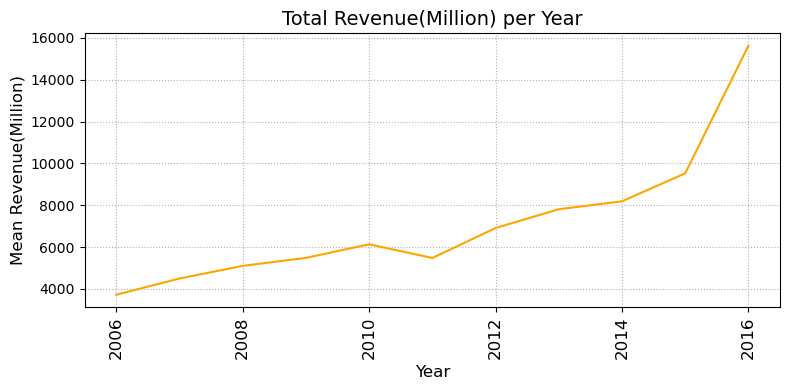

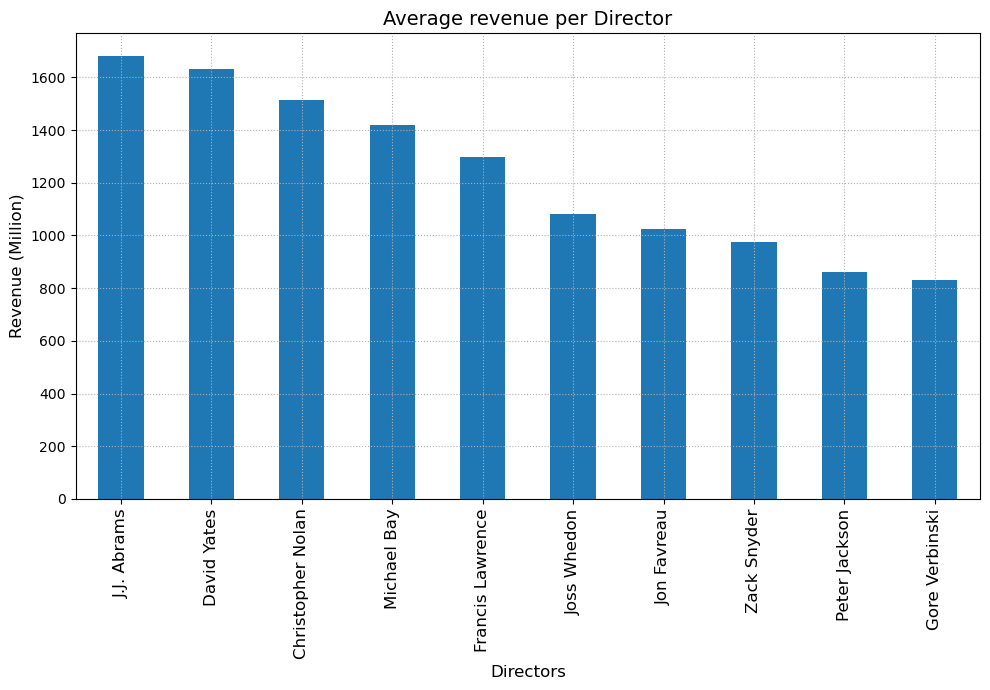

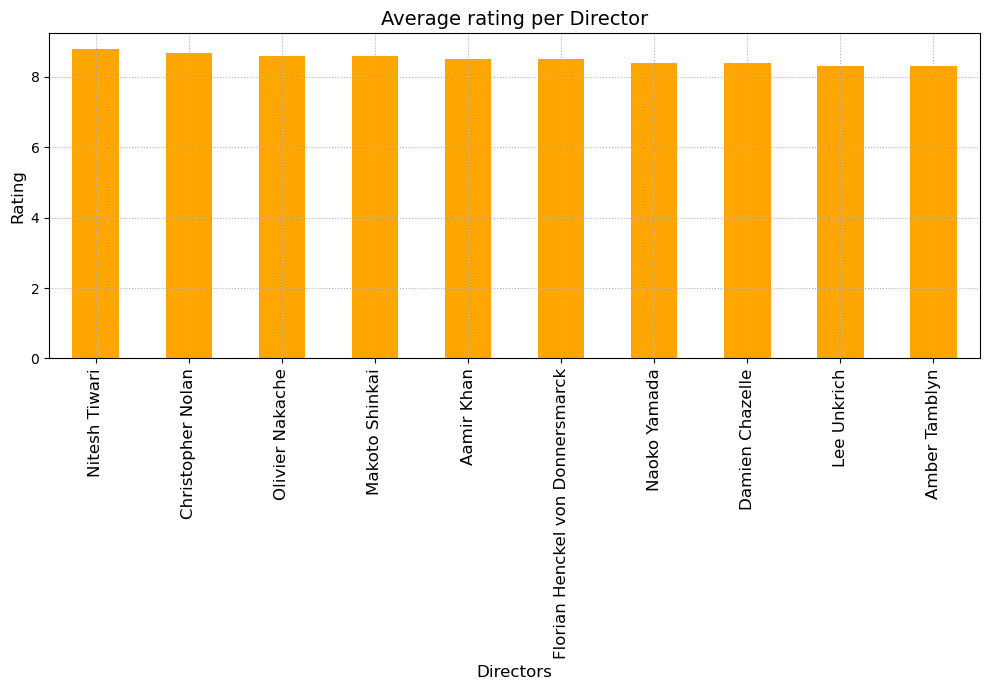

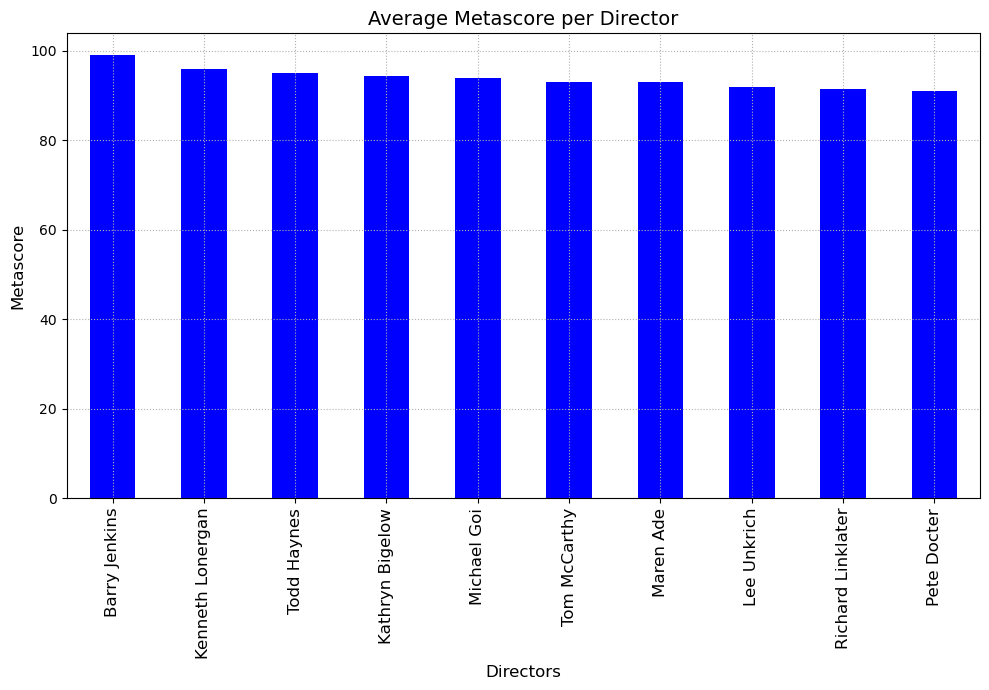

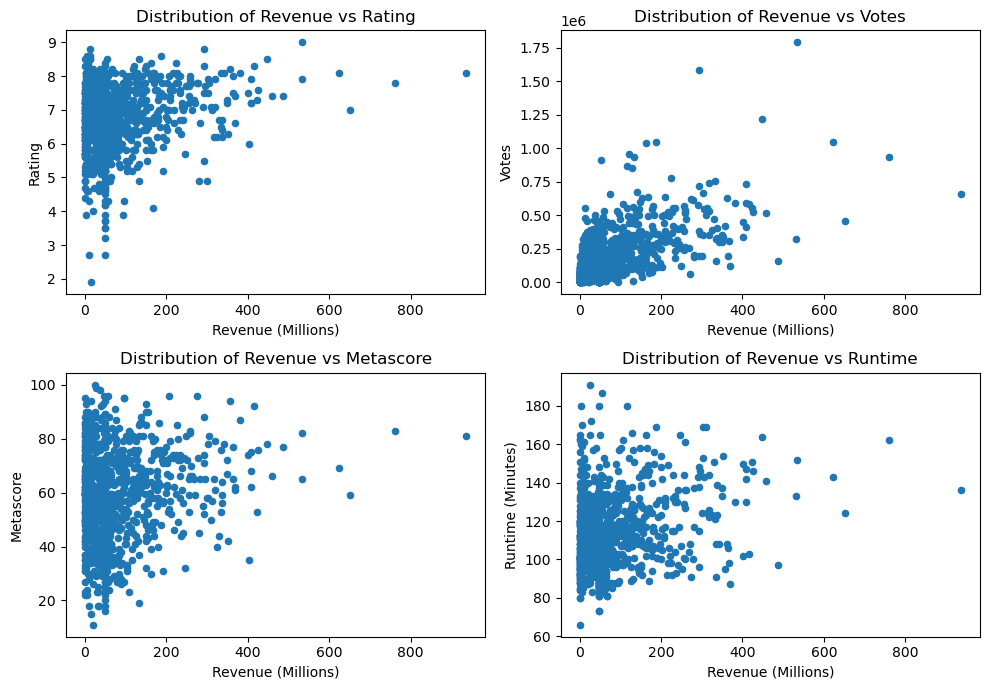

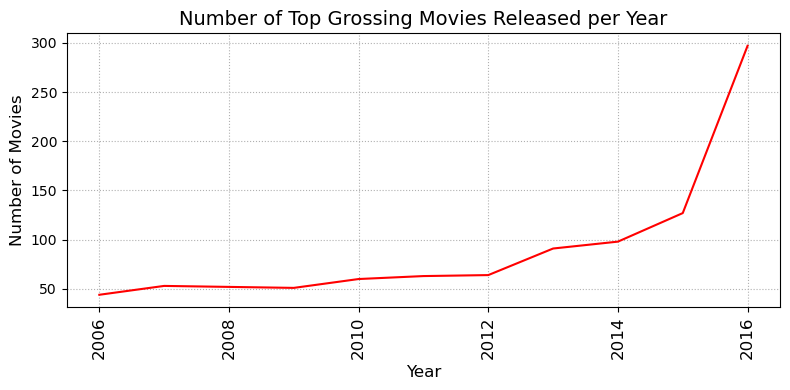

In [45]:
fig, my_axc = plt.subplots(figsize=(8,4))
clean_data.groupby(by=['Year']).agg({'Revenue (Millions)':'count'}).plot.line(ax=my_axc,color='red')
plt.xticks(rotation=90, fontsize=12)

my_axc.grid(linestyle=":") 

plt.title("Number of Top Grossing Movies Released per Year",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Movies",fontsize=12)
plt.legend().remove()
plt.tight_layout()

plt.savefig("moviesperyear.jpeg")
plt.show()

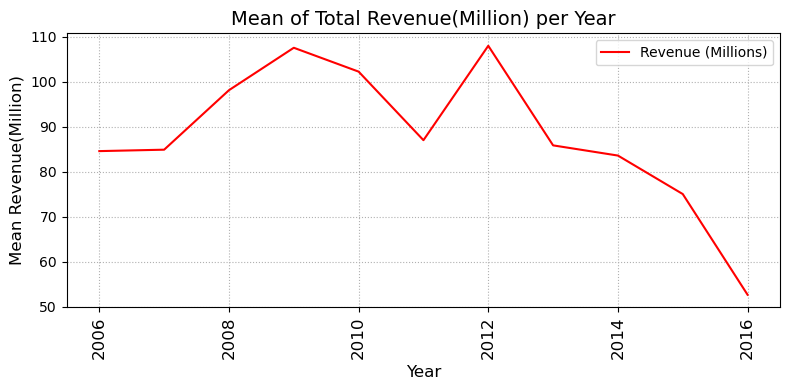

In [46]:
fig, my_axm = plt.subplots(figsize=(8,4))
clean_data.groupby(by=['Year']).agg({'Revenue (Millions)':'mean'}).plot.line(ax=my_axm,color='red')

plt.xticks(rotation=90, fontsize=12)

my_axm.grid(linestyle=":") 

plt.title("Mean of Total Revenue(Million) per Year",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Mean Revenue(Million)",fontsize=12)
plt.tight_layout()

plt.savefig("meanmovies.jpeg")
plt.show()

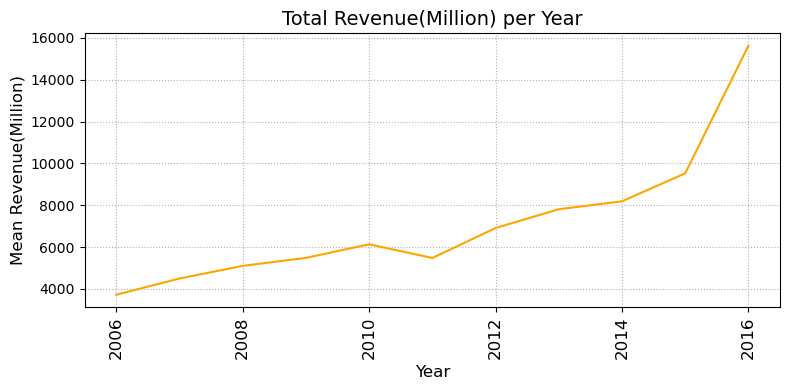

In [47]:
fig, my_axs = plt.subplots(figsize=(8,4))
clean_data.groupby(by=['Year']).agg({'Revenue (Millions)':'sum'}).plot.line(ax=my_axs,color='orange')
plt.xticks(rotation=90, fontsize=12)

my_axs.grid(linestyle=":") 

plt.title("Total Revenue(Million) per Year",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Mean Revenue(Million)",fontsize=12)
plt.legend().remove()
plt.tight_layout()

plt.savefig("summovies.jpeg")
plt.show()

### **Observation**
Although the total number of movie release has a upward trend but the mean revenue per movie per year has decreased after 2012, could be due to significant increase in number of movie release per year.

### **Q2: What are the top 10 grossing movies? How many movies has grossed over half million?**

In [31]:
# Finding top10 grossing movies
top10_movies=clean_data.sort_values(by='Revenue (Millions)', ascending=False)
top10_movies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy","Three decades after the defeat of the Galactic Empire, a new threat arises. The First Order attempts to rule the galaxy and only a ragtag group of heroes can stop them, along with the help of the Resistance.",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site of Jurassic Park, creates a genetically modified hybrid dinosaur, which escapes containment and goes on a killing spree.",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,Judy Greer",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together and learn to fight as a team if they are to stop the mischievous Loki and his alien army from enslaving humanity.,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, the Dark Knight must come to terms with one of the greatest psychological tests of his ability to fight injustice.",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi","The Rebel Alliance makes a risky move to steal the plans for the Death Star, setting up the epic saga to follow.",Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dory, begins a search for her long-lost parents, and everyone learns a few things about the real meaning of family along the way.",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kaitlin Olson",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi","When Tony Stark and Bruce Banner try to jump-start a dormant peacekeeping program called Ultron, things go horribly wrong and it's up to Earth's mightiest heroes to stop the villainous Ultron from enacting his terrible plan.",Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller","Eight years after the Joker's reign of anarchy, the Dark Knight, with the help of the enigmatic Selina, is forced from his imposed exile to save Gotham City, now on the edge of total annihilation, from the brutal guerrilla terrorist Bane.",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targets of the Capitol after their victory in the 74th Hunger Games sparks a rebellion in the Districts of Panem.,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Philip Seymour Hoffman",2013,146,7.6,525646,424.65,76.0


In [32]:
# Finding movies that have grossed over half billion dollars
half_bil=clean_data.query('`Revenue (Millions)`>=500')
print(" The movies which have revenue over 500 million:-", '\n', half_bil['Title'], '\n')


 The movies which have revenue over 500 million:- 
 12                                     Rogue One
50    Star Wars: Episode VII - The Force Awakens
54                               The Dark Knight
76                                  The Avengers
85                                Jurassic World
87                                        Avatar
Name: Title, dtype: object 



### **Q3: Which directors have most revenue, rating, metascore etc. per movie?**

In [33]:
clean_data['Director'].value_counts().head(10)

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Name: count, dtype: int64

In [34]:
# Arranging directors by total sum of revenue made by them
top_directors_mean=clean_data.groupby(by=['Director']).agg({'Revenue (Millions)':['count','sum', 'mean']})


In [35]:
top_directors_wrtrev=clean_data.groupby(by=['Director']).agg({'Revenue (Millions)':['sum']})

top_directors_wrtrev=top_directors_wrtrev.sort_values(by=('Revenue (Millions)','sum'), ascending=False).head(10)

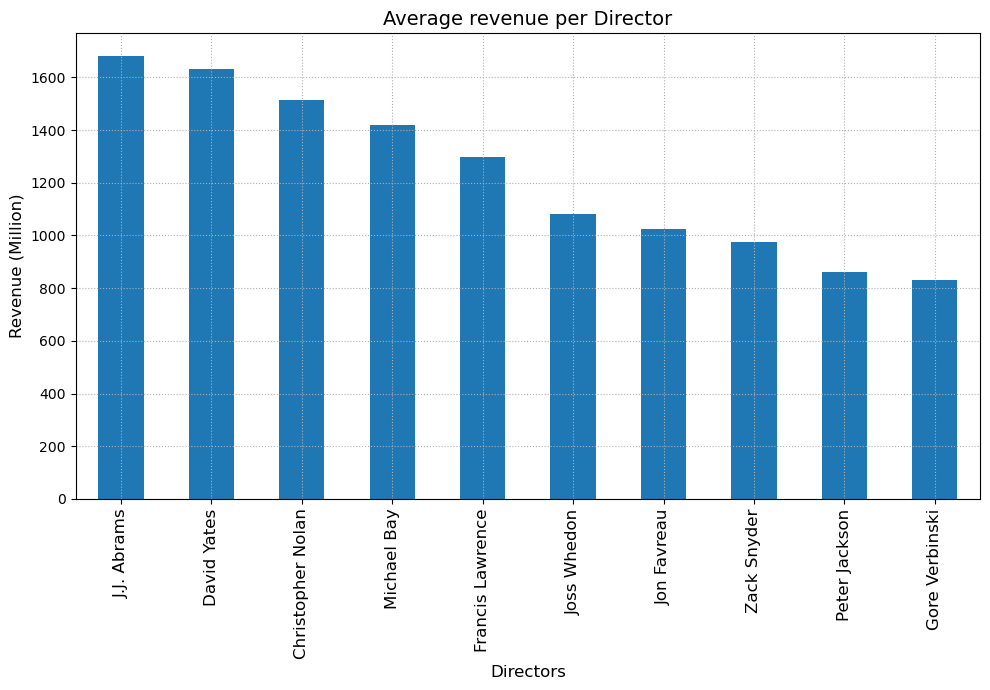

In [48]:
#Plotting the result
fig, my_ax = plt.subplots(figsize=(10,7))
top_directors_wrtrev.plot.bar(ax=my_ax)
plt.xticks(rotation=90, fontsize=12)
plt.grid(linestyle=":") 
plt.title("Average revenue per Director",fontsize=14)
plt.xlabel("Directors",fontsize=12)
plt.ylabel("Revenue (Million)",fontsize=12)
plt.legend().remove()
plt.savefig("dirrev.jpeg")
plt.tight_layout()
plt.show()

In [37]:
# Arranging directors by rating
top_directors=clean_data.groupby(by=['Director']).agg({'Rating':['mean']})
top_directors=top_directors.sort_values(by=('Rating', 'mean'), ascending=False).head(10)

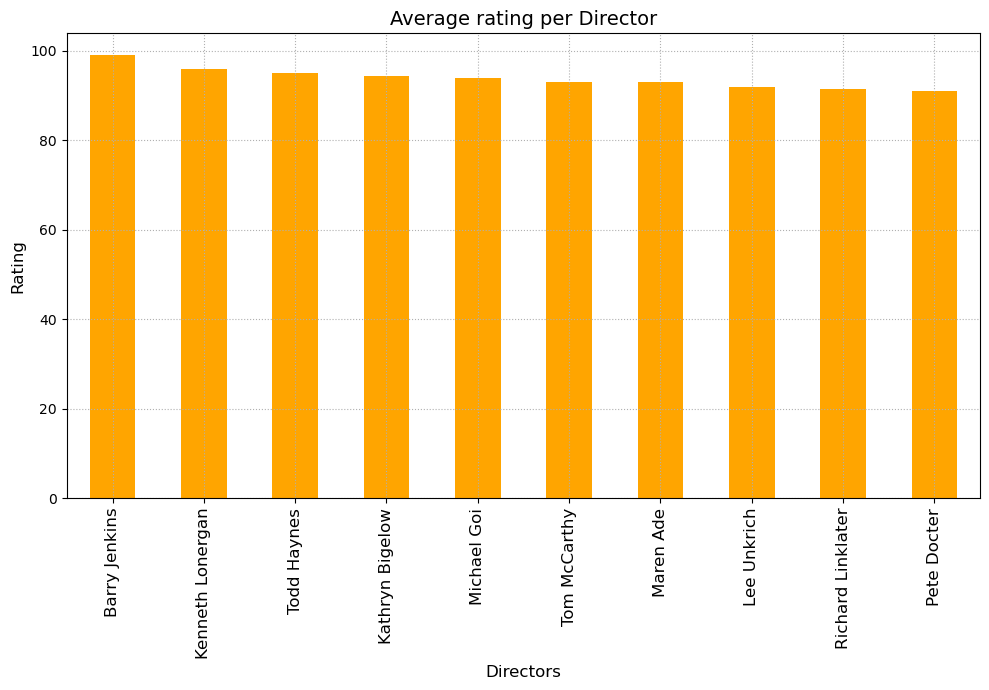

In [49]:
#Plotting the result
fig, my_ax = plt.subplots(figsize=(10,7))
top_directors.plot.bar(ax=my_ax,color='orange')
plt.xticks(rotation=90, fontsize=12)
plt.grid(linestyle=":") 
plt.title("Average rating per Director",fontsize=14)
plt.xlabel("Directors",fontsize=12)
plt.ylabel("Rating",fontsize=12)
plt.legend().remove()
plt.tight_layout()
plt.savefig("directorsrating.jpeg")
plt.show()

In [39]:
# Arranging directors by metascore
top_directors=clean_data.groupby(by=['Director']).agg({'Metascore':['mean']})
top_directors=top_directors.sort_values(by=('Metascore', 'mean'), ascending=False).head(10)

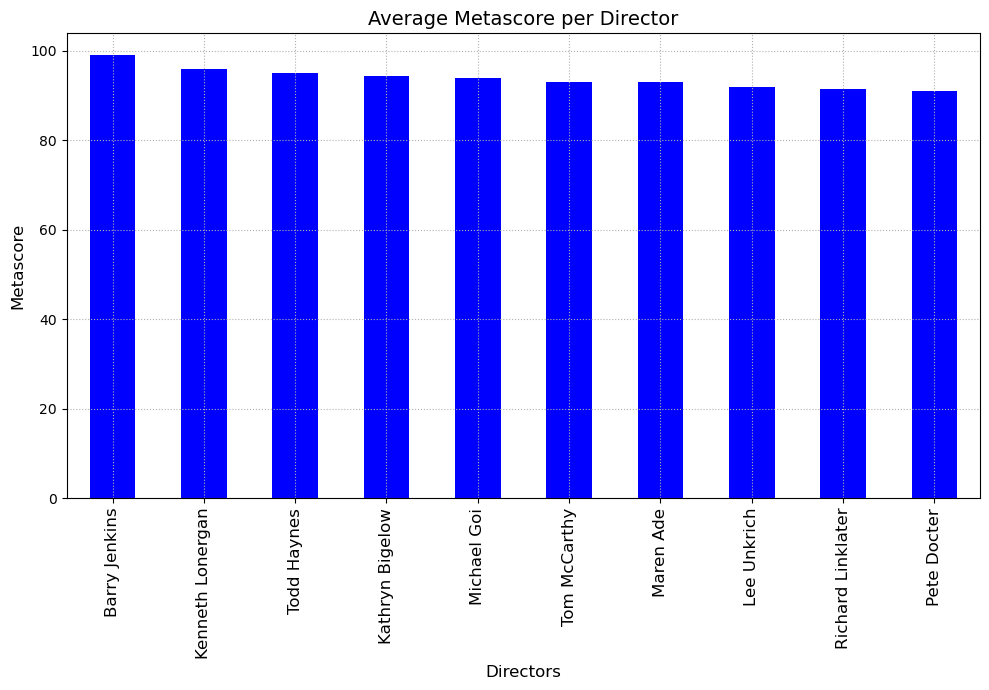

In [50]:
#Plotting the result
fig, my_ax = plt.subplots(figsize=(10,7))
top_directors.plot.bar(ax=my_ax,color='blue')
plt.xticks(rotation=90, fontsize=12)
plt.grid(linestyle=":") 
plt.title("Average Metascore per Director",fontsize=14)
plt.xlabel("Directors",fontsize=12)
plt.ylabel("Metascore",fontsize=12)
plt.legend().remove()
plt.savefig("dirmeta.jpeg")
plt.tight_layout()
plt.show()

 ### **Q4. Corelation between revenue, runtime, rating, metascore**

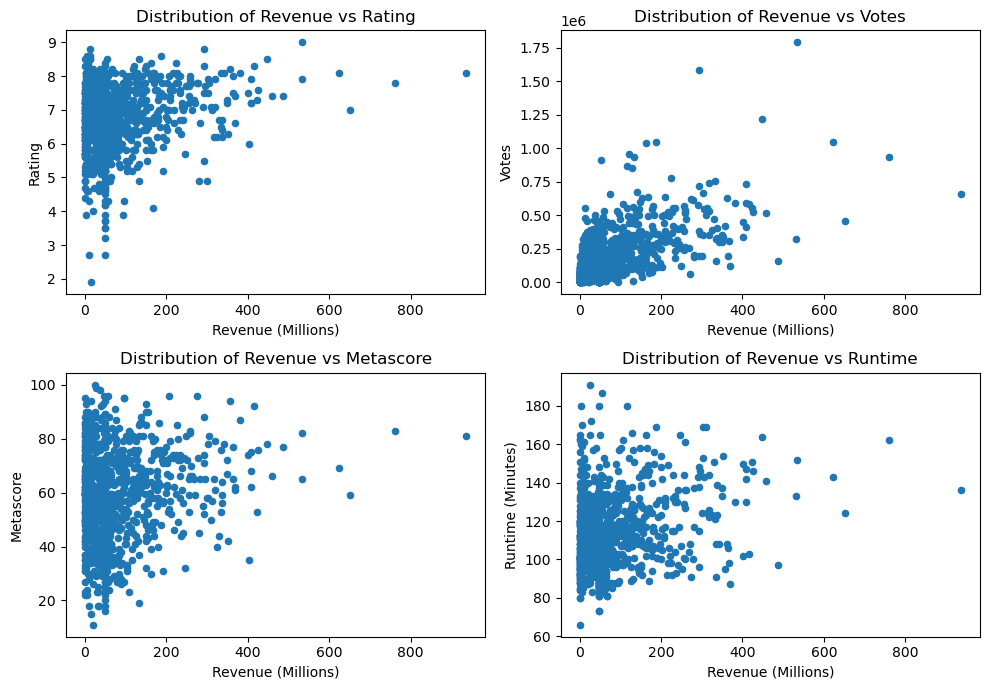

In [51]:
#Creating a scatter plot between Revenue and metascore
fig, my_ax = plt.subplots(figsize=(10,7), nrows=2, ncols=2)
# clean_data['Revenue (Millions)'].sns.scatterplot(data=clean_data,x='Metascore',y='Revenue (Millions)', hue='Rating')
clean_data.plot.scatter(ax=my_ax[0,0],x='Revenue (Millions)',y='Rating', title='Distribution of Revenue vs Rating')
clean_data.plot.scatter(ax=my_ax[1,0],x='Revenue (Millions)',y='Metascore', title='Distribution of Revenue vs Metascore')
clean_data.plot.scatter(ax=my_ax[0,1],x='Revenue (Millions)',y='Votes', title='Distribution of Revenue vs Votes')
clean_data.plot.scatter(ax=my_ax[1,1],x='Revenue (Millions)',y='Runtime (Minutes)', title='Distribution of Revenue vs Runtime')
plt.savefig("corr.jpeg")
plt.tight_layout()
plt.show()

### **Observations**
    ~Revenue (Millions) shows moderately positive correlation with Rating and Metascore.
    ~Runtime (Minutes) has a weak correlation with both Revenue (Millions).
    

### **Q5: What are the most popular genres?**

In [42]:
clean_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [43]:
# Checking top 10 combination of genres in term of total revenue
gen_data=clean_data.groupby(by=['Genre']).agg({'Revenue (Millions)':'sum'}).sort_values(by='Revenue (Millions)', ascending=False).head(10)
gen_data

,Revenue (Millions)
Genre,
"Action,Adventure,Sci-Fi",10461.510
"Animation,Adventure,Comedy",5802.735
"Action,Adventure,Fantasy",5296.275
Comedy,2229.720
"Adventure,Family,Fantasy",2201.470
"Animation,Action,Adventure",1759.260
"Action,Adventure,Thriller",1739.360
Drama,1669.685
"Adventure,Drama,Fantasy",1428.025


In [44]:
# Checking top 10 combination of genres in term of mean revenue

clean_data.groupby(by=['Genre']).agg({'Revenue (Millions)':'mean'}).sort_values(by='Revenue (Millions)', ascending=False).head(10)

,Revenue (Millions)
Genre,
"Adventure,Fantasy",272.156667
"Adventure,Drama,Fantasy",238.004167
"Action,Sci-Fi",232.780000
"Action,Adventure",223.740000
"Animation,Adventure,Comedy",214.916111
"Action,Fantasy,War",210.590000
"Action,Adventure,Sci-Fi",209.230200
"Adventure,Drama,Sci-Fi",208.210000
"Drama,Family,Fantasy",201.150000


### **Observations**
    ~ Movies with multiple genres have more sucess
    ~ Action, Adventure, Sci-Fi, Fantasy are the most popular genres

---
<a name = Section9></a>
 **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**
    ~The correlation analysis reveals that movies with higher ratings and metascores tend to generate more revenue, however movies with a higher voting rate do not necessarily generate revenues. Runtime shows a weak correlation with revenue and ratings, indicating that movie length is not a significant factor in these outcomes. Overall, ensuring high quality as reflected in ratings and metascores appears to be crucial for maximizing revenue. Additionally, genres such as Action, Adventure, Sci-Fi, and Fantasy are the most popular, often leading to higher revenue. 

<a name = Section92></a>
### **9.2 Actionable Insights**
    ~  The total number of movie release has increased quite drastically but the mean revenue per movie per year has been decreased after 2012. To maximize revenue, focus on producing high-quality films with strong ratings and metascores. Prioritize genres such as Action, Adventure, Sci-Fi, and Fantasy, as they tend to be more popular and financially successful. While voting rates do not directly impact revenue, maintaining high production values and audience engagement remains essential.

